In [45]:
using Distributions
using Plots
plot();

In [167]:
θ = 1 #0.2
θ=0.2
p=1/3
β₁=1
β₂=2


2

In [147]:
JPP(λ,T)=begin
    Jump=[.0]
    while Jump[end]<T
        push!(Jump,Jump[end]+fₓ(λ))
    end
    Jump[1:end]
end

JPP (generic function with 1 method)

In [148]:
K=Geometric(θ/(θ+1))

Geometric{Float64}(p=0.16666666666666669)

In [149]:
f(t)=β₁*β₂*(p*exp(-β₁*t) + (1-p)*exp(-β₂*t))/(p*β₂+(1-p)*β₁)

f (generic function with 1 method)

In [150]:
maximum(f(t)*exp(t) for t in 0:0.01:99)

1.3333333333333333

In [151]:
Exp(λ)=-log(rand())/λ

Exp (generic function with 1 method)

In [152]:
Y()=begin
    c_inv=3/4
    X=Exp(1)
    U=rand()
    while U> f(X)*exp(X)*c_inv
        U=rand()
        X=Exp(1)
    end
    return X
end

Y (generic function with 1 method)

In [153]:
Y()

1.1222289882045007

In [154]:
wyn(u)=begin
    k=rand(K)
    return k>0 ? sum(Y() for i in 1:k) > u : 0
end

wyn (generic function with 1 method)

In [155]:
rysk(n,u=10)=begin
    sum(wyn(u) for i in 1:n)/n
end

rysk (generic function with 2 methods)

In [156]:
rysk(1000000,1)

0.674673

In [157]:
rysk(10000,1)

0.6717

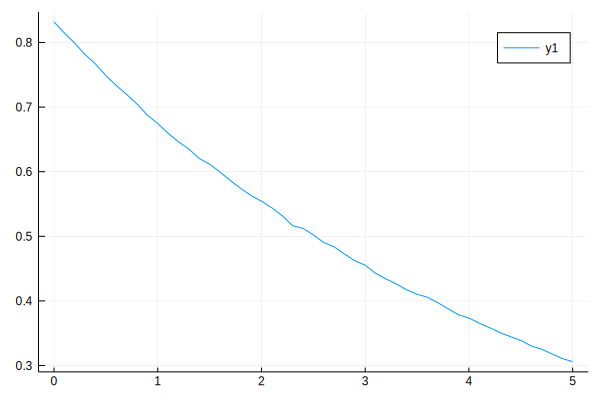

In [164]:
plot(0:0.1:5,u->rysk(10^5,u))

In [162]:
ψ(u)=begin
    a₁=p
    a₂=1-p
    P=a₁/β₁/(a₁/β₁+a₂/β₂)
    ρ=β₁*(1-P)+β₂*P
    r₁=(ρ+θ*(β₁+β₂)-( (ρ+θ*(β₁+β₂))^2 - 4*β₁*β₂*θ*(1+θ) )^(1/2))/(2*(1+θ))
    r₂=(ρ+θ*(β₁+β₂)+( (ρ+θ*(β₁+β₂))^2 - 4*β₁*β₂*θ*(1+θ) )^(1/2))/(2*(1+θ))
    
    1/(1+θ)/(r₂-r₁)*(  (ρ-r₁)*exp(-r₁*u) + (r₂-ρ)*exp(-r₂*u) )
end

ψ (generic function with 1 method)

In [169]:
ψ(10)

0.09232414713151535

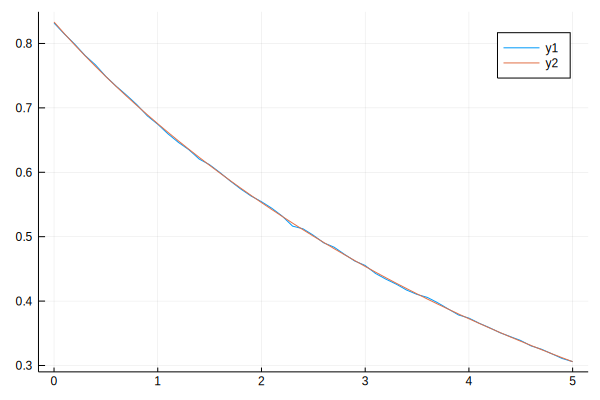

In [165]:
plot!(0:0.1:5, ψ)